# CS 6220 Data Mining — Assignment 9 — Model Evaluation — Samuel Steiner

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
# accuracy_score, recall_score, precision_score, classification_report, confusion_matrix, roc_curve, PrecisionRecallDisplay

In [47]:
# 1. Split the dataset into training set and test set (80, 20).
breast_cancer_data = load_breast_cancer()
X = breast_cancer_data.data
y = breast_cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [48]:
# 2. Using scikit-learn’s DecisionTreeClassifier, train a supervised learning model that can be used to generate predictions for your data.
base_dt_clf = DecisionTreeClassifier()
base_dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
# 3. Similarly as in previous step, train another Decision Tree Classifier - but in this case 
# set the maximum depth of the tree to 1 (max_depth = 1). Use the same training and
# test set as you used for the Decision Tree in the previous step.
depth_1_dt_clf = DecisionTreeClassifier(max_depth=1)
depth_1_dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [50]:
# 4. Report on the six evaluation metrics listed in objective for both the models, and compare their results.
#   1. The accuracy of your model on the test data
#   2. The precision and recall values
#   3. A classification report (scikit-learn has a function that can create this for you)
#   4. The confusion matrix for this experiment
#   5. An ROC curve
#   6. A Precision/Recall curve

def clf_report(clf, x_test, y_true, y_pred):
    print(f"Accuracy: {metrics.accuracy_score(y_true, y_pred):.2f} \n")
    print(f"Precision: {metrics.precision_score(y_true, y_pred):.2f} \n")
    print(f"Recall: {metrics.recall_score(y_true, y_pred):.2f} \n")
    print(f"Classification Report: \n {metrics.classification_report(y_true, y_pred)} \n")
    print("Confusion Matrix:")
    cm = metrics.confusion_matrix(y_true, y_pred, labels=clf.classes_)
    confusion_displ = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
    confusion_displ.plot()
    plt.show()
    print("ROC curve:")
    fpr, tpr, _ = metrics.roc_curve(y_true, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    display.plot()
    plt.show()
    print("Precision/Recall curve:")
    precision, recall, _ = metrics.precision_recall_curve(y_true, y_pred)
    disp = metrics.PrecisionRecallDisplay(precision=precision, recall=recall)
    disp.plot()
    plt.show()


Metrics for base decision tree classifier, no max depth given.
Accuracy: 0.95 

Precision: 0.97 

Recall: 0.94 

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        43
           1       0.97      0.94      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114
 

Confusion Matrix:


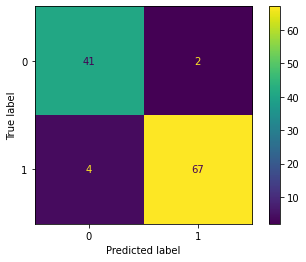

ROC curve:


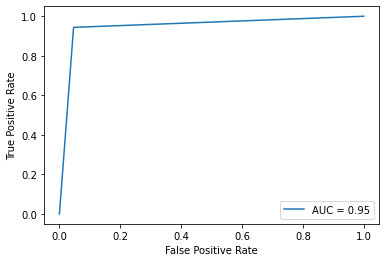

Precision/Recall curve:


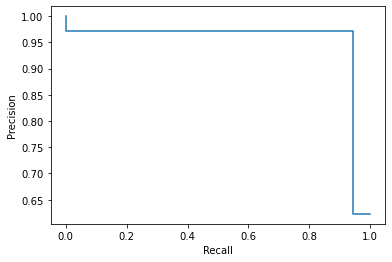

In [51]:
print("Metrics for base decision tree classifier, no max depth given.")
clf_report(base_dt_clf, X_test, y_test, base_dt_clf.predict(X_test))

Metrics for base decision tree classifier, max depth 1.
Accuracy: 0.89 

Precision: 0.89 

Recall: 0.93 

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.81      0.84        43
           1       0.89      0.93      0.91        71

    accuracy                           0.89       114
   macro avg       0.88      0.87      0.88       114
weighted avg       0.89      0.89      0.89       114
 

Confusion Matrix:


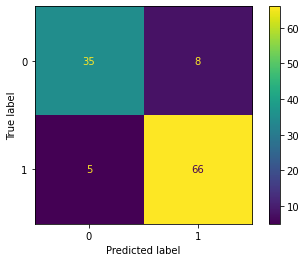

ROC curve:


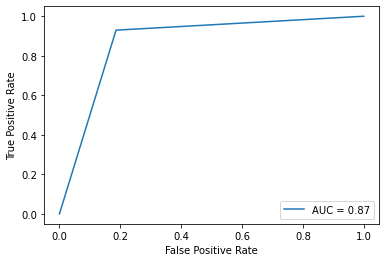

Precision/Recall curve:


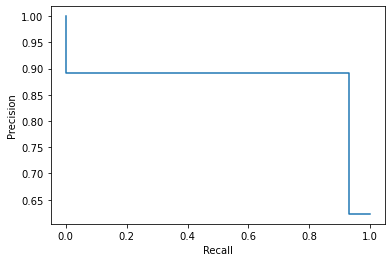

In [52]:
print("Metrics for base decision tree classifier, max depth 1.")
clf_report(depth_1_dt_clf, X_test, y_test, depth_1_dt_clf.predict(X_test))

## Comparing the classifiers

| | Defualt | Max Depth 1 | Analysis |
| --- | --- | --- | --- |
| Accuracy | 0.95  | 0.89 | The default settings had a higher accuracy but both were close, since the training time was relatively similar it is probably worth to just use the default settings |
| Precision / Recall | 0.97 / 0.94 | 0.89 / 0.93 | Again the default settings had a higher precision and recall but the recall was very close. |
| Classification Report | see above | see above | Similar to above analysis | 
| Confusion Matrix | see above | see above | Similar to above analysis |
| ROC Curve | see above | see above | Similar to above analysis |
| Precission/Recall Curve | see above | see above | Similar to above analysis |


Overall the default settings preformed better but the metrics showed that even with a depth of one you can get pretty good results. To me this showcases that exploration of the parameters fo these models and classifiers should be explored to see what the best settings are for mixing the best preformance vs cost. This also showcases that sometimes that including all information is not always the best method of creating classifiers. These types of analysis can create genuine insight into the data and generate useful knowledge for future experiments.